# Label individual color stops based on number of categories

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import RegularPolygon
import matplotlib.colors as mcolors
import pickle
from collections import OrderedDict



In [ ]:
def rgb_to_hex(rgb):
    """Convert RGB values (0-1 range) to HEX format."""
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

In [34]:
# First open the grad colors file 
pickleColorFile = 'gradscolors_37.pkl'

fp = open(pickleColorFile, 'rb')
grad_colors = pickle.load(fp)
fp.close()
grad_colors

OrderedDict([('0', [0.0, 0.0, 0.0]),
             ('1', [1.0, 1.0, 1.0]),
             ('2', [0.9804, 0.2353, 0.2353]),
             ('3', [0.0, 0.8627, 0.0]),
             ('4', [0.1176, 0.2353, 1.0]),
             ('5', [0.0, 0.7843, 0.7843]),
             ('6', [0.9412, 0.0, 0.5098]),
             ('7', [0.902, 0.8627, 0.1961]),
             ('8', [0.9412, 0.5098, 0.1569]),
             ('9', [0.6275, 0.0, 0.7843]),
             ('10', [0.6275, 0.902, 0.1961]),
             ('11', [0.0, 0.6275, 1.0]),
             ('12', [0.902, 0.6863, 0.1765]),
             ('13', [0.0, 0.8235, 0.549]),
             ('14', [0.5098, 0.0, 0.8627]),
             ('15', [0.6667, 0.6667, 0.6667]),
             ('21', [1.0, 0.9804, 0.6667]),
             ('22', [1.0, 0.9098, 0.4706]),
             ('23', [1.0, 0.7529, 0.2353]),
             ('24', [1.0, 0.6275, 0.0]),
             ('25', [1.0, 0.3765, 0.0]),
             ('26', [1.0, 0.1961, 0.0]),
             ('27', [0.8824, 0.0784, 0.0]),
           

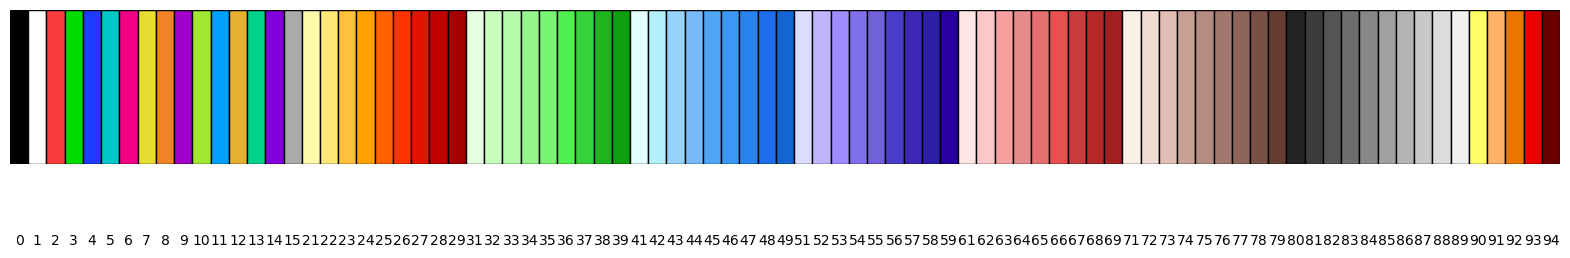

In [35]:
'''Plot colors'''

# Plot the colors
fig, ax = plt.subplots(figsize=(20, 2))

for i, (key, rgb) in enumerate(grad_colors.items()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=rgb, ec="black"))
    ax.text(i + 0.5, -0.5, key, ha='center', va='center', fontsize=10)

ax.set_xlim(0, len(grad_colors))
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

In [37]:
len(grad_colors)

85

In [42]:
# Next convert to RGB to Hex
colors_ = OrderedDict(grad_colors)

In [55]:
'''Convert to RGB and retain order'''
hex_color_dict = {}
for i in colors_.items():
    hex_color_dict[i[0]] = rgb_to_hex(i[1])

In [58]:
#19 different classes

##Percentile cutoffs
clevs = [
   0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100
]

 

# RGBs
#Brown/tan
d5 = hex_color_dict['78'] #0-5%
d10 = hex_color_dict['76'] #5-10%
d15 = hex_color_dict['73'] #10-15%

#Red
d20 = hex_color_dict['29'] #15-20%
d25 = hex_color_dict['27'] #20-25%
d30 = hex_color_dict['25'] #25-30%

#Orange
d35 = hex_color_dict['24'] #30-35%
d40 = hex_color_dict['23'] #35-40%
d45 = hex_color_dict['22'] #40-45%

#Yellow (same color, no need for a distinction based on subject expertise)
d50 = hex_color_dict['21'] #45-50%
d55 = hex_color_dict['21'] #50-55%

#Green
d60 = hex_color_dict['33'] #55-60%
d65 = hex_color_dict['36'] #60-65%
d70 = hex_color_dict['39'] #65-70%

#Blue
d75 = hex_color_dict['43'] #70-75%
d80 = hex_color_dict['46'] #75-80%
d85 = hex_color_dict['49'] #80-85%

#Purple
d90 = hex_color_dict['53'] #85-90%
d95 = hex_color_dict['56'] #90-95%
d100 = hex_color_dict['59'] #95-100%

all_colors = [d5,d10,d15,d20,d25,d30,d35,d40,d45,d50,d55,d60,d65,d70,d75,d80,d85,d90,d95,d100]

# Create a custom colormap from discrete colors
my_cmap = mcolors.ListedColormap(all_colors)
# Normalize the percentile cutoffs for proper mapping
norm = mcolors.BoundaryNorm(clevs, my_cmap.N)




In [60]:
'''This equals the stops needed only for soil moisture CONUS from Disasters'''
all_colors

['#784f45',
 '#a0786e',
 '#e1beb4',
 '#a50000',
 '#e11300',
 '#ff6000',
 '#ffa000',
 '#ffbf3c',
 '#ffe778',
 '#fffaaa',
 '#fffaaa',
 '#b4faaa',
 '#4ff04f',
 '#0ea00e',
 '#95d1fa',
 '#3c95f5',
 '#1364d1',
 '#a08bff',
 '#483cc7',
 '#2800a0']

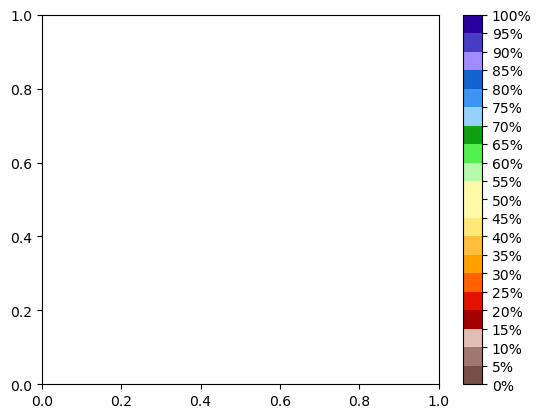

In [59]:
fig, ax = plt.subplots()
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=my_cmap, norm=norm), ax=ax, ticks=clevs)
cb.ax.set_yticklabels([f"{c}%" for c in clevs])  # Label in percentages
plt.show()